In [3]:
%load_ext autoreload
%autoreload 2

import parenclitic
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import display, SVG
import igraph

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
print(igraph.__version__)
print (parenclitic.__all__)

NameError: name 'igraph' is not defined

In [31]:
kernel = parenclitic.pdf_kernel(thr_type = 'best', min_score = 0.5)
kernel = kernel.fit(X[:, 0], X[:, 1], y, mask)
kernel.get_edges()
#plt.scatter(kernel.p, mask)
#plt.plot([kernel.best_thr, kernel.best_thr], [-1, 1])

(array([False, False, False, False, False,  True,  True, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False,  True, False, False,
         True, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True, False, False,  True,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False]),
 array([0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.

In [18]:
num_samples = 100
num_features = 30
shift = 2
X = np.random.randn(num_samples, num_features)
y = np.random.randint(2, size = (num_samples, ))
#y[0] = 0
#y[1] = 1
#print(y.shape)
#y[:] = 1

#print(y.shape)
mask = np.array(y, np.int32)
X[mask == 0, :] += shift
mask[y == 0] = -1

#clf = parenclitic.parenclitic(kernel = parenclitic.pdf_kernel(thr_p = 0.999), verbose = 0)
clf = parenclitic.parenclitic(kernel = parenclitic.pdf_kernel(thr_type = 'best'), verbose = 0)
clf.fit(X, y, mask)
clf.calc_parenclitic(need_weights = True)
gr = clf.get_graphs()


Number of edges: 213: 100%|████████████████████████████████████████████████████████| 435/435 [00:00<00:00, 1063.83it/s]

In [15]:
np.dtype

numpy.dtype

In [18]:
import matplotlib.pylab as pylab
import matplotlib
import seaborn
seaborn.set_style('white', {'legend.frameon':True})
fontsize = 40
params = {'legend.fontsize': fontsize,
  'figure.figsize': (18, 15),
 'axes.labelsize': fontsize,
 'axes.titlesize':fontsize,
 'xtick.labelsize':fontsize,
 'ytick.labelsize':fontsize}
pylab.rcParams.update(params)

#plt.style.use('ggplot')
%matplotlib inline

Text(0, 0.5, 'Marker 2')

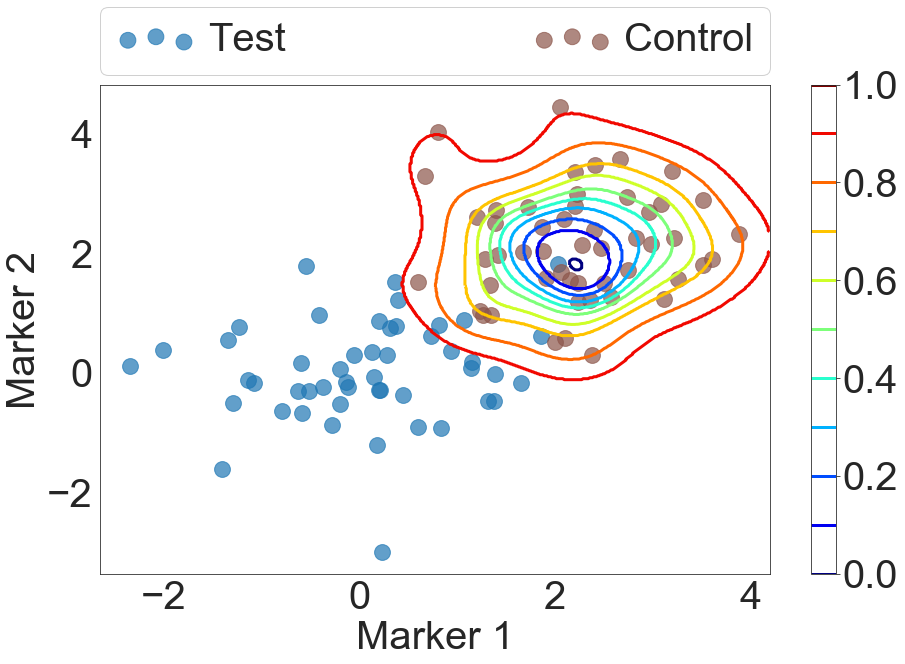

In [19]:
import scipy.stats as stats
def plot_kde_dist(fig, ax, xu, xv, kde_mask, threshold_p = 0, num_points = 100000):
    
    data = np.array([xu[kde_mask], xv[kde_mask]]).astype('float32')
    kde = stats.gaussian_kde(data)

    points = kde.resample(num_points)
    pr = np.array(kde(points))
    pr = np.sort(pr)
    
    x_min = np.min(xu)
    x_max = np.max(xu)
    y_min = np.min(xv)
    y_max = np.max(xv)
    
    dx = (x_max - x_min) * 0.05
    dy = (y_max - y_min) * 0.05
    
    x_min -= dx
    x_max += dx 
    y_min -= dy
    y_max += dy
    
    Xm, Ym = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
    positions = np.vstack([Xm.ravel(), Ym.ravel()])
    #threshold_p = 0.9
    ZI = np.zeros(Xm.shape[0] * Xm.shape[1])
    for i, pt in enumerate(positions.T):
        p = kde(np.array([pt[0], pt[1]])) # .reshape(1, -1)
        pos = np.searchsorted(pr, p)
        w = float(num_points - pos) / num_points
        ZI[i] = w
        if ZI[i] < threshold_p:
            ZI[i] = 0
    ZI = np.reshape(ZI, Xm.shape)
    
    out = ax.contour(Xm, Ym, ZI, np.linspace(0, 1, 11), cmap = 'jet', linewidths = 3) # , **params
    #ZI = np.log(1 - ZI, Xm.shape)
    
    #im = ax.imshow(np.rot90(ZI), cmap="jet", extent=[x_min, x_max, y_min, y_max], aspect='auto')#, norm=matplotlib.colors.LogNorm())
    
    cb = fig.colorbar(out)
    cb.set_clim(0,1)
    

fig = plt.figure(figsize = (15, 9))
ax = plt.axes()
xu = X[:, 0]
xv = X[:, 1]
plot_kde_dist(fig, ax, xu, xv, mask, threshold_p = 0, num_points = 100)
labels = ['Test', 'Control']
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
ax.set_prop_cycle('color', [colors[0], colors[5], colors[1]])

for c in [0, 1]:
    ax.scatter(xu[mask == c], xv[mask == c], 250, label = labels[c], alpha=0.7)
ax.legend(framealpha=0.9, fontsize=fontsize, bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=3, mode="expand", borderaxespad=0., handletextpad=0.3, scatterpoints=3)   
plt.xlabel('Marker 1', fontsize = fontsize)
plt.ylabel('Marker 2', fontsize = fontsize)

In [20]:
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

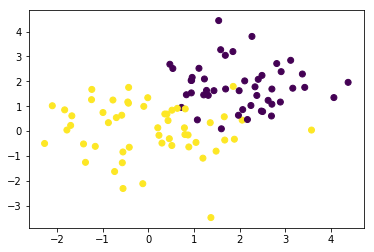

In [21]:
plt.scatter(X[:, 0], X[:, 1], c = mask)

217 220 205 228 223 225 210 221 225 225 169 207 223 225 220 170 227 210 224 189 228 203 210 227 224 202 225 228 211 189 223 223 185 221 228 204 224 215 182 225 207 195 217 183 196 228 210 216 182 226 223 211 193 216 224 199 223 172 224 213 211 199 223 228 217 226 224 224 210 198 226 223 207 149 227 161 223 221 228 204 215 219 217 196 206 220 166 223 211 220 209 203 201 226 222 227 190 223 222 227 

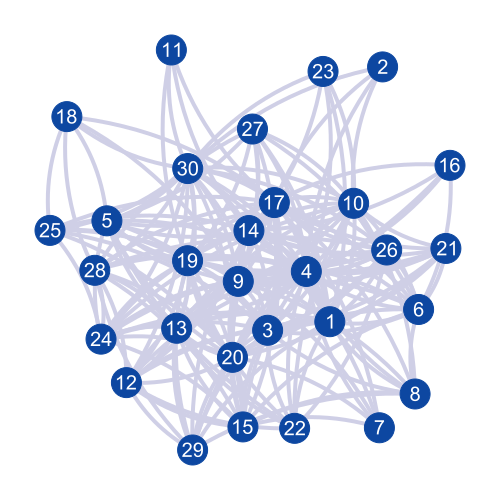

In [21]:
for g in gr:
    print(g.ecount(), end=' ')
visual_style = {}
visual_style["bbox"] = (300, 300)
visual_style["margin"] = 10
cmap = plt.cm.Purples
norm = matplotlib.colors.Normalize() 

g = gr[11]

visual_style["edge_width"] = 4
visual_style["edge_color"] = np.array(cmap(0.3 + norm(np.array(g.es['weight']))))[:, 0:3].tolist()
visual_style["vertex_color"] = '#0D47A1'
visual_style["vertex_frame_color"] = visual_style["vertex_color"]
visual_style["vertex_label_size"] = 20
visual_style["vertex_size"] = 30
visual_style["vertex_label"] = [str(x + 1) for x in range(30)]
visual_style["vertex_label_color"] = 'white'
visual_style["vertex_label_dist"] = -0.5
visual_style["edge_curved"] = [0.2 for x in range(g.ecount())]
visual_style["bbox"] = [500, 500]
visual_style["margin"] = np.array([0.5, 0.5, 0.5, 0.5]) * 100
p = igraph.plot(g, "graph.png", **visual_style)
display(SVG(p._repr_svg_()))

In [10]:
par = clf.get_parenclitic()
print (type(par))
print (par.shape)
print (parenclitic.parenclitic.metric_names())
print (par.head())

<class 'pandas.core.frame.DataFrame'>
(100, 40)
{'degrees': 'Degrees', 'min_degrees': 'Min degrees', 'max_degrees': 'Max degrees', 'mean_degrees': 'Mean degrees', 'std_degrees': 'Std degrees', 'efficiency': 'Efficiency', 'betweenness': 'Betweenness', 'min_betweenness': 'Min betweenness', 'max_betweenness': 'Max betweenness', 'mean_betweenness': 'Mean betweenness', 'std_betweenness': 'Std betweenness', 'closeness': 'Closeness', 'min_closeness': 'Min closeness', 'max_closeness': 'Max closeness', 'mean_closeness': 'Mean closeness', 'std_closeness': 'Std closeness', 'pagerank': 'Pagerank', 'min_pagerank': 'Min pagerank', 'max_pagerank': 'Max pagerank', 'mean_pagerank': 'Mean pagerank', 'std_pagerank': 'Std pagerank', 'eigenvalues': 'Eigenvalues', 'min_eigenvector_centrality': 'Min eigenvector centrality', 'max_eigenvector_centrality': 'Max eigenvector centrality', 'mean_eigenvector_centrality': 'Mean eigenvector centrality', 'std_eigenvector_centrality': 'Std eigenvector centrality', 'num_

In [9]:
parenclitic.__all__

['parenclitic', 'pdf_kernel', 'classifier_kernel']

In [7]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
par_numeric = par.select_dtypes(include=numerics)
print (par_numeric.head())

   efficiency   max_IPR  max_betweenness  max_closeness  max_degrees  \
0   12.785207  0.704458            177.0       3.332507    42.018580   
1    0.000000  1.000000              0.0       0.033333     0.000000   
2    3.668922  0.500000             33.0       0.060284     3.189633   
3    6.396413  0.650000            102.0       4.238327    31.636519   
4    1.450383  0.500000             27.0       0.053510     3.049204   

   max_eigenvector_centrality  max_pagerank  max_weights  mean_IPR  \
0                         1.0      0.039119     2.573403  0.321016   
1                         1.0      0.033333          NaN  1.000000   
2                         1.0      0.110202     0.474736  0.278776   
3                         1.0      0.039142     1.638885  0.300922   
4                         1.0      0.169275     0.574375  0.299838   

   mean_betweenness  ...  min_weights  num_edges  robustness  std_betweenness  \
0         21.933333  ...     0.000443        364          19     

In [6]:
c = np.random.rand(2000, 2000)
a = np.random.rand(2000, 2000)
b = np.random.rand(2000, 2000)    
while True:
    c *= a

KeyboardInterrupt: 